# Topics 01: Newton's Laws of Motion

---

### Classical Physics Topic: Newton's Laws of Motion

### Classical Physics Explanation

**Newton's laws of motion** describe the relationship between a physical object and the forces acting on it and its motion in response to those forces. These three laws form the foundation of classical mechanics:

1. **First Law (Inertia)**: An object will remain at rest or in uniform motion unless acted upon by a net external force.

2. **Second Law (F=ma)**: The acceleration of an object is proportional to the net force acting on it and inversely proportional to its mass, F=ma.

3. **Third Law (Action-Reaction)**: For every action, there is an equal and opposite reaction.

In quantum mechanics, **momentum** and **force** are quantized, and quantum states can be used to represent the position and momentum of particles. By using quantum gates and qubits, we can model the effects of forces on a quantum particle and simulate the changes in motion as dictated by Newton's laws.

### Quantum Computing Approach

In quantum computing, qubits can represent the **position** and **momentum** of a particle, and quantum gates can be used to simulate the **forces** acting on the particle. The evolution of the qubit's state under these forces can be used to model **Newton’s second law** by simulating how the quantum state (analogous to velocity or momentum) evolves under the influence of force (quantum gates).

By applying **Hadamard gates**, **Pauli-X gates**, and **Phase gates**, we can simulate an object’s response to a force and observe how its motion changes over time.

---

### Qiskit Program to Simulate Newton’s Second Law (F = ma)

In this Qiskit program, we will simulate **Newton’s second law of motion** using qubits. The qubit will represent the momentum of a particle, and quantum gates will simulate the forces acting on it. We will observe how the quantum state evolves in response to these forces and how the object’s motion changes.

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Check the versions of installed packages
import qiskit
import qiskit_aer
import numpy as np
import matplotlib

print(f"qiskit: {qiskit.__version__}")
print(f"qiskit_aer: {qiskit_aer.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

qiskit: 1.2.4
qiskit_aer: 0.15.1
numpy: 1.24.3
matplotlib: 3.9.2


### Step 1: Create the Quantum Circuit

- We start by creating a quantum circuit with **1 qubit**. The qubit will represent the **momentum** or **velocity** of an object, and its state will evolve based on the forces acting on the system (simulated by quantum gates).

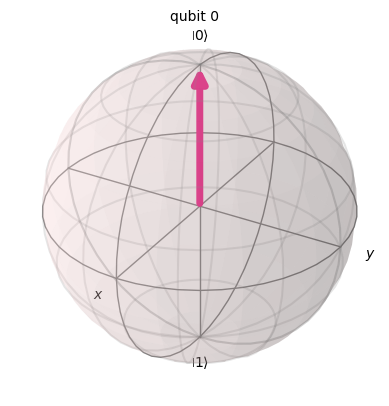

In [3]:

# Step 1: Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)
plot_bloch_multivector(qc)

### Step 2: Initialize the Qubit

- We initialize the qubit in the |0⟩ state, representing the **initial velocity or momentum** of the system. In classical terms, this would correspond to the object being at rest (zero initial velocity or momentum).

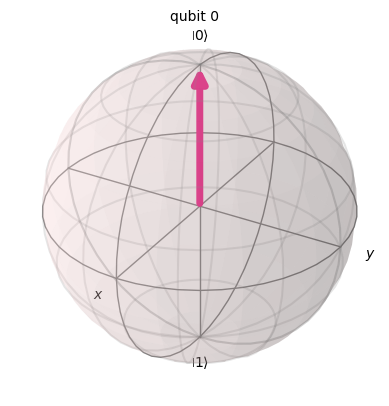

In [4]:
qc.initialize([1, 0], 0)
plot_bloch_multivector(qc)

### Step 3: Apply the Hadamard Gate (H Gate)

- A **Hadamard gate** is applied to the qubit, placing it in a **superposition** of |0⟩ and |1⟩. This represents the object gaining momentum or velocity due to applying an external force. The object can now move in both positive and negative directions.

$$
|\psi⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)
$$

This gate simulates the **acceleration** of the object due to the applied force.

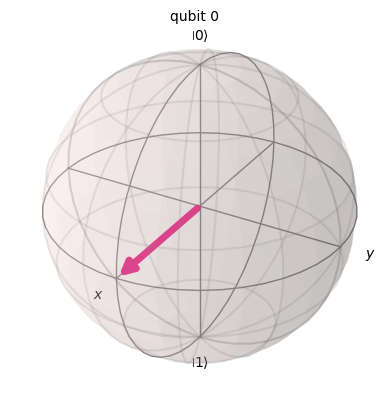

In [5]:
# Step 3: Apply a Hadamard gate to put the qubit in superposition (simulating the object gaining velocity/momentum)
# This represents the object under an external force, producing motion in both positive and negative directions
qc.h(0)
plot_bloch_multivector(qc)


### Step 4: Apply a Phase Gate (P Gate)

- A **Phase gate** is applied to introduce a **phase shift** in the qubit’s state, simulating the effect of **force** over time. In classical mechanics, this corresponds to the continuous application of force, which changes the object’s velocity (or momentum) as time progresses.

A phase shift of $\frac{π}{4}$ represents a slight **change in momentum** or **velocity** due to the applied force.

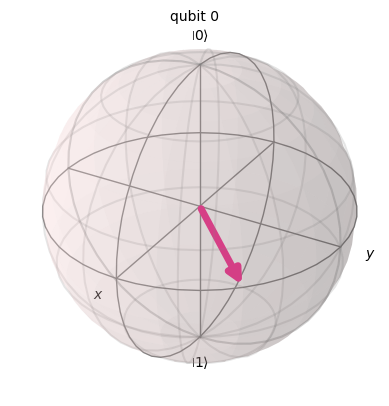

In [6]:
# Step 4: Apply a Phase gate to simulate the effect of force over time (analogous to changing velocity/momentum)
# The phase shift represents the change in motion due to the applied force
qc.p(np.pi/4, 0)
plot_bloch_multivector(qc)


### Step 5: Apply the Pauli-X Gate (X Gate)

- The **Pauli-X gate** is applied to flip the qubit’s state, representing the **reaction force** as per **Newton’s third law**. When a force is applied to an object, there is an equal and opposite reaction. This gate simulates the **recoil** or **opposite motion** of the object as a result of the applied force.

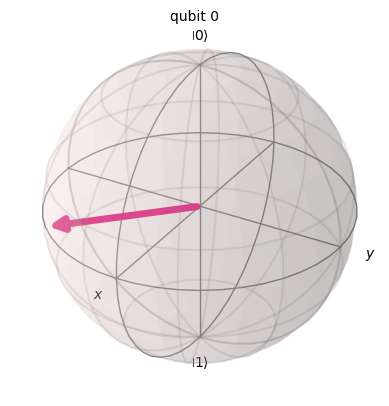

In [7]:
# Step 5: Apply a Pauli-X gate to simulate the reaction force (Newton’s Third Law)
# This simulates the opposite reaction, such as the recoil of an object, by flipping the qubit’s state
qc.x(0)
plot_bloch_multivector(qc)


### Step 6: Apply Another Phase Gate

- Another **Phase gate** is applied to simulate further **changes in motion** due to the continued application of force. This phase shift corresponds to the object accelerating as the force is applied over a longer period.

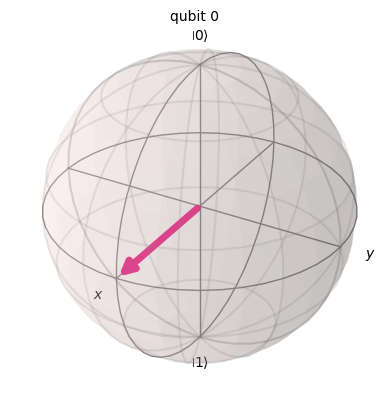

In [8]:
# Step 6: Apply another Phase gate to simulate further motion due to continued force
qc.p(np.pi/4, 0)
plot_bloch_multivector(qc)


### Step 7: Visualize the Bloch Sphere

- To visualize the system’s state after applying these quantum gates, we use the **Bloch sphere** representation. The Bloch sphere helps us see the qubit’s state in 3D space, showing how its momentum (or velocity) evolves as force is applied.

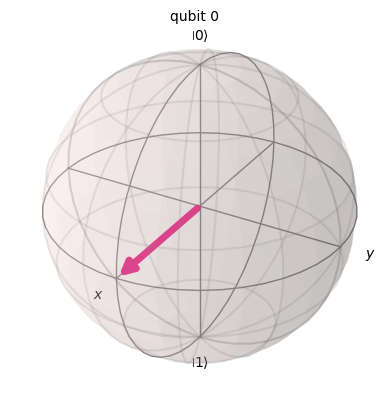

In [9]:
# Step 7: Visualize the qubit's state on the Bloch sphere to observe the effect of the applied forces
simulator = StatevectorSimulator()
job = simulator.run(qc).result()
final_state = job.get_statevector()

plot_bloch_multivector(final_state)


### Step 8: Measurement

- Finally, we measure the qubit to observe the **final momentum state** of the object. The measurement collapses the qubit into either |0⟩ (representing a stationary state) or |1⟩ (representing motion with momentum). This is analogous to observing the object’s velocity or momentum at a particular point after applying the forces.

In [10]:
# Step 8: Measure the qubit to observe the final momentum state
qc.measure_all()


### Step 9: Simulate the Measurement and Plot the Results

- We simulate the quantum circuit using the **Qasm simulator**, which runs the circuit multiple times and records the measurement outcomes. The results represent the **probability distribution** of the object being in different momentum states after applying the forces.

In [11]:
# Step 9: Simulate the measurement and plot the results
simulator = QasmSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()


- Finally, we plot the measurement results using a **histogram** to visualize the probability of the object being in different momentum states.

Measurement results: {'1': 513, '0': 511}


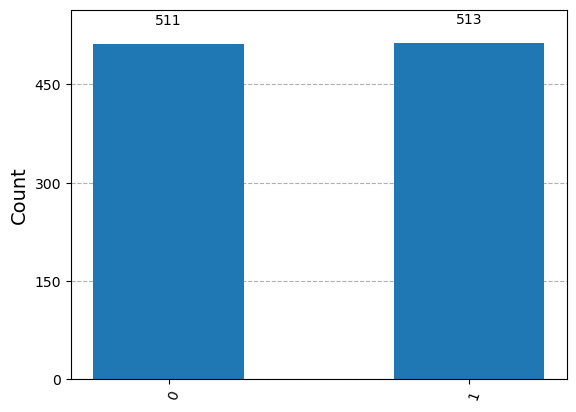

In [12]:
# Print the measurement results and plot the histogram
print(f"Measurement results: {counts}")
plot_histogram(counts)


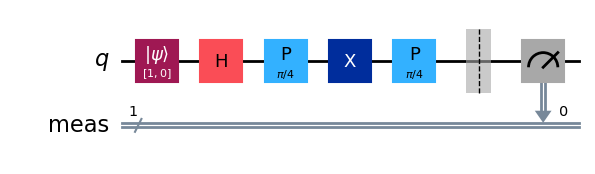

In [13]:
# Draw the quantum circuit
qc.draw(output='mpl')

### Classical Physics Parallel

In classical physics, **Newton’s second law of motion** describes how the **velocity** or **momentum** of an object changes in response to a force. The force applied to an object causes an acceleration proportional to the force and inversely proportional to the object’s mass. In this Qiskit simulation, we use qubits to model the motion of an object under the influence of force:

- The **Hadamard gate** represents the object **gaining momentum** due to the application of force.

- The **Phase gate** models the **continuous effect of force** over time, changing the object’s motion.

- The **Pauli-X gate** simulates the **reaction force** per Newton’s third law, where the object moves in the opposite direction due to the applied force.

- The **measurement** represents observing the object’s **final velocity or momentum** at a particular point in time.

### Educational Value

This program helps students understand the concept of **Newton’s second law of motion** by simulating how an object’s momentum or velocity changes under the influence of force. The Bloch sphere visualization provides an intuitive way to see how the qubit’s state evolves as force is applied, making it easier to explore the relationship between force, acceleration, and momentum in classical and quantum systems.

### Summary:

**Newton’s laws of motion** are fundamental concepts in classical mechanics that describe how objects move under the influence of forces. Using quantum computing, we can simulate the changes in an object’s momentum or velocity using qubits and quantum gates. The Qiskit program models how force causes acceleration (or changes in momentum) and how the object’s motion evolves. By measuring the qubit’s state, we can observe the final motion of the object, providing a parallel between classical and quantum mechanical descriptions of motion.